# EDA

In [230]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# check na values
# 700 701
# bins wrong!!!

pd.set_option("display.max_rows", 10)

# Quick data exploration and quality check EDA

df_priceData = pd.read_excel("prices_202209.xlsx", header=0, skiprows=[1], index_col=0)
#df_priceData.describe()
#df_priceData.info()
#df_priceData.isnull().sum()


# daily return, vol table, corr table

In [231]:


df_priceData = pd.read_excel("prices_202209.xlsx", header=0, skiprows=[1], index_col=0)

# Daily returns
df_dailyReturn = df_priceData.pct_change(1)
df_dailyReturn.index.name = 'Date'

# Volatility table
df_volTable = pd.DataFrame([df_dailyReturn.std() * np.sqrt(250) * 100],
                           index=['Annualized Volatility (in %)'])
df_volTable = df_volTable.round(2)


# Correlation table
df_corrTable = df_dailyReturn.corr(method='pearson')
df_corrTable = df_corrTable.where(np.tril(np.ones(df_corrTable.shape)).astype(bool)).round(2)


#display(df_dailyReturn, df_volTable, df_corrTable)

# VaR (hist)

In [ ]:
# from scipy.stats import norm
alpha = 0.99
# 99% 1-day VaR by using the 250 day historical daily return
weights = np.array([.25,.25,.25,.25])


import plotly.offline as offline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import plotly.graph_objs as go
offline.init_notebook_mode(connected=True)
#pd.set_option('display.max_rows', 10)

#df_dailyReturn = 
#df_dailyReturn.reset_index(inplace=True)
#.rename(columns={df.index.name:'bar'})
#df_dailyReturn

weighted_return = (weights * df_dailyReturn)
weighted_return
#.melt(id_vars=['Date'], var_name='Ticker', value_name='cumulative returns')


# portfolio calculation
portfolio_return = weighted_return.sum(axis=1)

The simple historical VaR is -0.057776713783542044


<AxesSubplot:>

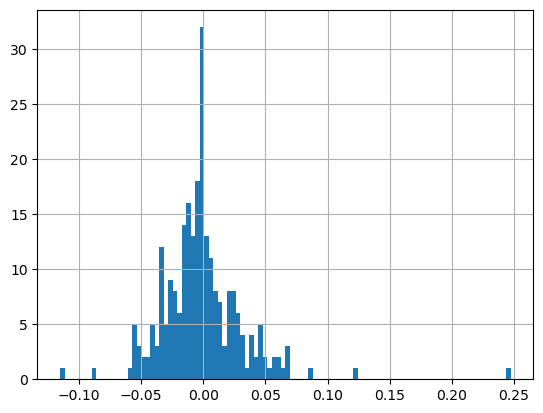

In [263]:
p = 0.01
a = portfolio_return[-250:]

#weights = [0.25, 0.25, 0.25, 0.25] 
#PnL = (weights * returns.values).sum(axis=1)

historic_var = np.percentile(a, 1, interpolation="lower")
print(f'The simple historical VaR is {historic_var}')
#The simple historical VaR is -1.6171199605525266

a.hist(bins=100)

fig, ax = plt.subplots(figsize = (6,4))
avocado.plot(kind = "hist")
plt.show()

In [241]:
df_covMatrix = df_dailyReturn.cov()
df_covMatrix 

df_returnMean = df_dailyReturn.mean()
df_returnMean

df_dailyReturn.count()[0]

from scipy.stats import norm
alpha = 0.99
# 99% 1-day VaR by using the 250 day historical daily return
weights = np.array([.25,.25,.25,.25])


port_mean = df_returnMean @ weights
port_std = np.sqrt(weights.T @ df_covMatrix @ weights)

port_mean
port_std

0.028279354244239878

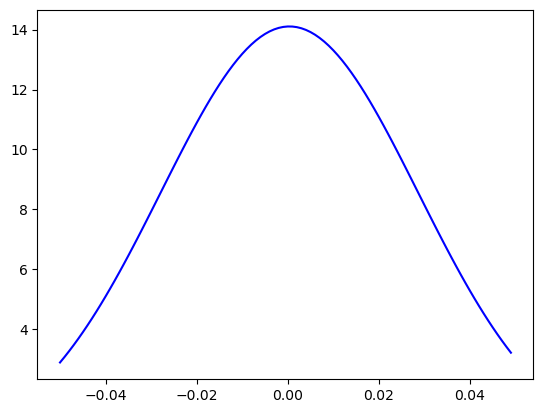

-1.0344280798962335

In [247]:
def historicalVaR(returns, alpha=1):
    """
    alpha: confidence level
    """
    
    returns.aggregate(hist
    
    raise TypeError("expected returns to be df")

#mean_ = daily_return.mean()
#cov_max = daily_return.cov()

#returns = np.sum(mean_*weights)*250
#std = np.sqrt(np.dot(weights.T,np.dot(cov_max,weights)))*np.sqrt(250)

#std


VaR = np.percentile(df, 1-alpha)*100


plt.axvline(VaR, label='var', color='#CE5757')
plt.legend()
plt.show()




x = np.arange(-0.05,0.05,0.001)
norm_dist = norm.pdf(x, port_mean, port_std)

norm_dist

plt.plot(x, norm_dist, color='b')
plt.show()


alpha = 0.99
VaR = norm.ppf(1-alpha, port_mean, port_std)
VaR

num_days = 250
VaR * np.sqrt(num_days)

# cum line graph


In [ ]:

cumprod_portfolio = (1 + portfolio_return).cumprod()


# plotly
fig,ax=plt.subplots(figsize=(12,6))
#ax.spines[['top','right','left','bottom']].set_visible(False)
plt.plot(cumprod_portfolio, color='#008000')
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative return')
plt.title('Portfolio Cumulative Historical Returns')
plt.show()

# histo

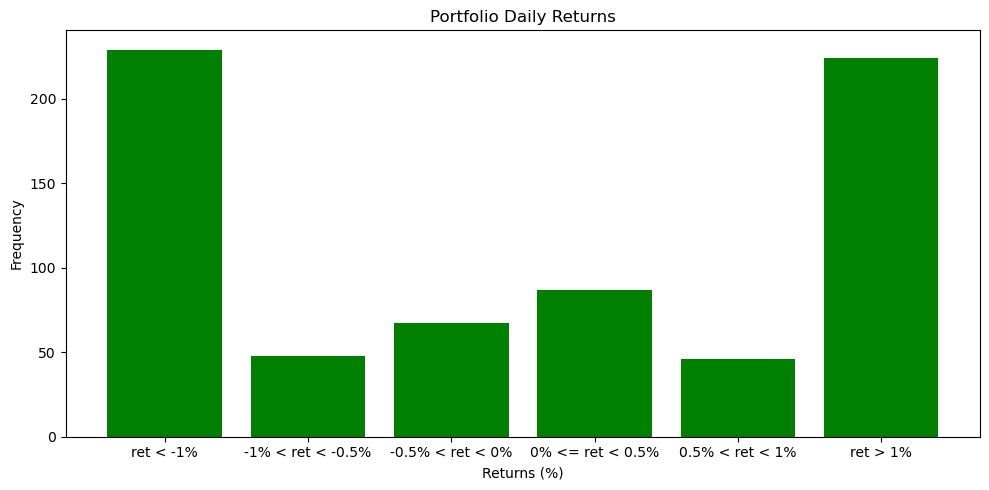

In [264]:
#701  700
labels=['ret < -1%','-1% < ret < -0.5%','-0.5% < ret < 0%','0% <= ret < 0.5%','0.5% < ret < 1%','ret > 1%']


df_freqPortReturn = portfolio_return.copy().to_frame(name='# of events')


df_freqPortReturn.loc[df_freqPortReturn['# of events']
                      .between(-np.inf, -0.01, 'left'), 'Bins'] = 'ret < -1%'
df_freqPortReturn.loc[df_freqPortReturn['# of events']
                      .between(-0.01, -0.005, 'left'), 'Bins'] = '-1% < ret < -0.5%'
df_freqPortReturn.loc[df_freqPortReturn['# of events']
                      .between(-0.005, 0, 'left'), 'Bins'] = '-0.5% < ret < 0%'
df_freqPortReturn.loc[df_freqPortReturn['# of events']
                      .between(0, 0.005, 'left'), 'Bins'] = '0% <= ret < 0.5%'
df_freqPortReturn.loc[df_freqPortReturn['# of events']
                      .between(0.005, 0.01, 'left'), 'Bins'] = '0.5% < ret < 1%'
df_freqPortReturn.loc[df_freqPortReturn['# of events']
                      .between(0.01, np.inf, 'right'), 'Bins'] = 'ret > 1%'

pd.Categorical(df_freqPortReturn["Bins"], categories = labels)

df_freqPortReturn = df_freqPortReturn.groupby('Bins').count()
df_freqPortReturn['% of events'] = ((df_freqPortReturn['# of events']/df_freqPortReturn['# of events'].sum()) * 100).round(2)
df_freqPortReturn = df_freqPortReturn.reindex(labels, axis=0).transpose()

df_freqPortReturn




fig = plt.figure(figsize=(10,5))

plt.bar(df_freqPortReturn.columns, df_freqPortReturn.loc['# of events'], color ='green',
        width = 0.8)

#fig, ax = plt.subplots()

#fruits = ['apple', 'blueberry', 'cherry', 'orange']
#counts = [40, 100, 30, 55]
#bar_labels = ['red', 'blue', '_red', 'orange']
#bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

#ax.bar(fruits, counts, label=bar_labels, color=bar_colors)

#ax.set_ylabel('fruit supply')
#ax.set_title('Fruit supply by kind and color')
#ax.legend(title='Fruit color')

#plt.show()

 
plt.xlabel("Returns (%)")
plt.ylabel("Frequency")
plt.title("Portfolio Daily Returns")
plt.tight_layout()
plt.show()